<a href="https://colab.research.google.com/github/SongRuHuang/LinearRegression/blob/main/%E6%88%BF%E5%83%B9%E9%A0%90%E6%B8%AC%E6%A8%A1%E5%9E%8B%E7%B7%9A%E6%80%A7%E5%9B%9E%E6%AD%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Housing Dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.shape

(545, 13)

Data Wrangling and EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [10]:
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = df['price']

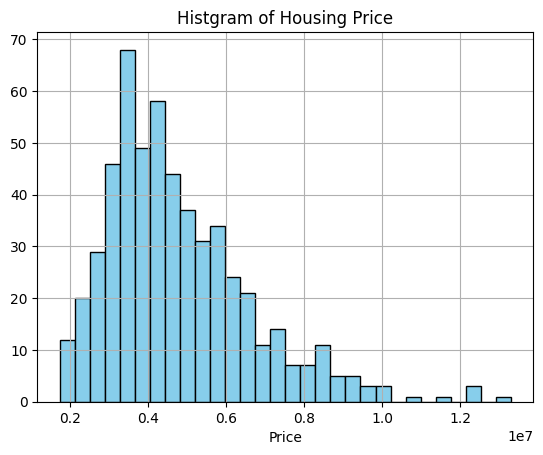

In [11]:
#check the distribution of price
plt.hist(y, bins=30, color='skyblue', edgecolor='black')
plt.title('Histgram of Housing Price')
plt.xlabel('Price')
plt.grid()
plt.show()

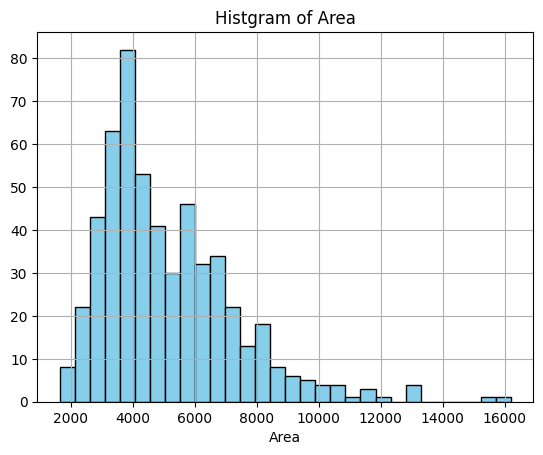

In [12]:
#check the distribution of area
plt.hist(X['area'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histgram of Area')
plt.xlabel('Area')
plt.grid()
plt.show()

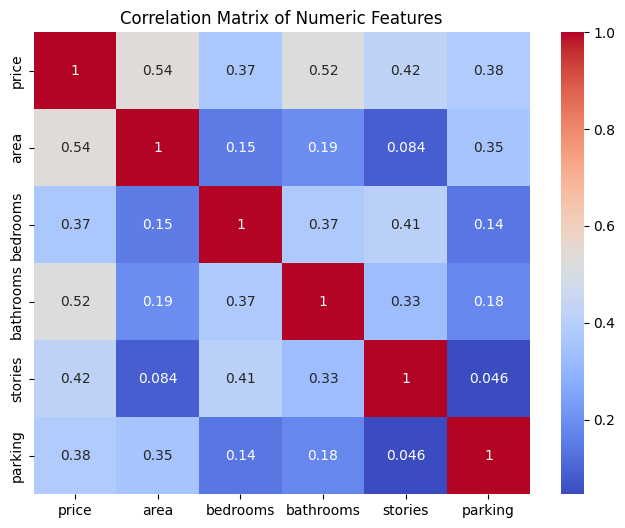

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

##Linear Regression Model


In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)
predicted_value = model.predict(X)

In [15]:
predicted_value

array([ 7648873.96926545, 11351808.25562893,  7774157.72976678,
        7505019.68808916,  5967193.99706753,  7545413.96449038,
        9714647.91601608, 10554485.58183922,  6192352.53387428,
        7098444.82485053,  7713231.77186716,  7764490.31910526,
        6435267.39012518,  5802961.41816039,  6303755.6824849 ,
        5497009.99373577,  6451823.16489038,  8386608.72564924,
        5999378.67493707,  6224412.58767788,  4772926.17356719,
        6297438.95592573,  5082450.87282555,  5608537.76641234,
        7390063.75521408,  6809552.5238847 ,  6803627.40996398,
        5355621.15645139,  7444235.16032119,  6087596.12005593,
        8047215.34296259,  6756195.32000842,  5882304.51296741,
        7205839.62252276,  5565360.50913639,  7889935.48269316,
        7123997.05320396,  8719976.26135904,  6425079.82470437,
        7349033.48673432,  4756121.15067009,  6922828.98827344,
        7717755.42513505,  7726629.77544689,  7349033.48673432,
        6255687.60045079,  7181223.69867

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

print('The MAE value is ', mean_absolute_error(y, predicted_value))
print('The MSE value is ', mean_squared_error(y, predicted_value))
print('The RMSE value is ', math.sqrt(mean_squared_error(y, predicted_value)))
#also print the coefficient of determination
print('The R^2 value is ', model.score(X, y))

The MAE value is  909001.0525855441
The MSE value is  1531008562668.3982
The RMSE value is  1237339.3078167355
The R^2 value is  0.5615825438679802


In [17]:
model.coef_

array([3.31115495e+02, 1.67809788e+05, 1.13374016e+06, 5.47939810e+05,
       3.77596289e+05])

In [18]:
model.intercept_

np.float64(-145734.4894558806)

In [19]:
for feature, coef in zip(X.columns, model.coef_):
  print(f'{feature}: {coef}')

area: 331.1154953040509
bedrooms: 167809.78805777594
bathrooms: 1133740.1626847433
stories: 547939.8095131849
parking: 377596.28871256596


##linear Regression房價預測公式

price = -145734 + 331 * area + 167809 * bedroom + 1133740 * bathrooms + 547939 * stories + 377596 * parking

In [21]:
new_house = np.array([[8000, 4, 3, 2, 2]]) #(1, 5)
predicted_price = model.predict(new_house)
predicted_price

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8426721.30971336])

In [23]:
columns = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
new_house = pd.DataFrame([[8000, 4, 3, 2, 2]], columns=columns) #(1, 5)
predicted_price = model.predict(new_house)
predicted_price[0]

array([8426721.30971336])